[3, 0, 2, 0] 2
[3, 0, 2, 0] 2
[1, 0, 2, 0] 2
[0, 0, 2, 0] 4
[1, 0, 2, 0] 2
[1, 0, 2, 2] 3
[1, 0, 2, 0] 2
[1, 3, 2, 0] 1
[3, 3, 2, 0] 3
[1, 1, 2, 0] 2
[1, 3, 2, 0] 1
[1, 3, 2, 2] 2
[0, 3, 2, 0] 3
[1, 3, 2, 3] 3
[0, 3, 2, 0] 3
Solution: [1, 3, 2, 0]
Number of conflicts: 1


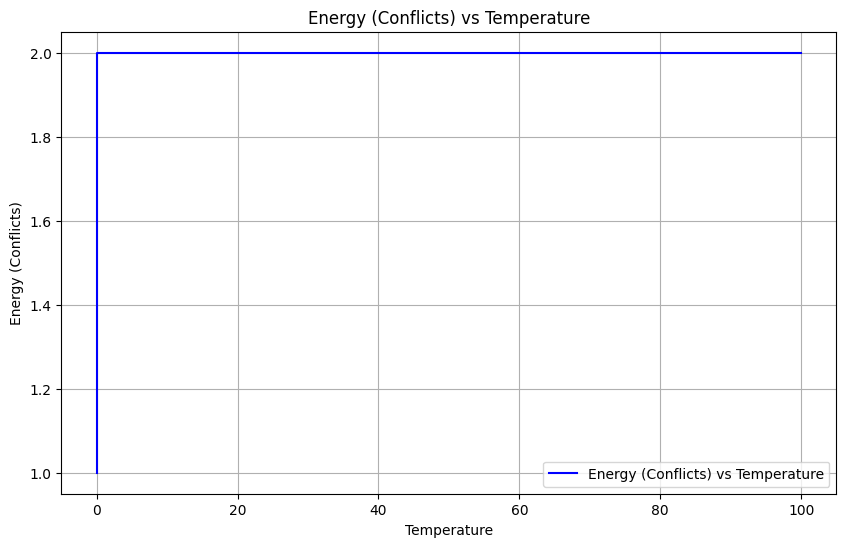

In [2]:
import random
import math
import matplotlib.pyplot as plt
# Initial configuration [3, 1, 2, 0]
initial_state = [3, 1, 2, 0]

# Function to calculate the number of conflicts (attacking queens)
def count_conflicts(state):
    conflicts = 0
    n = len(state)
    for i in range(n):
        for j in range(i + 1, n):
            # Check if two queens are in the same row or diagonals
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

# Function to generate a neighbor by randomly changing one queen's position
def generate_neighbor(state):
    neighbor = state[:]
    idx = random.randint(0, len(state) - 1)
    new_position = random.randint(0, len(state) - 1)
    neighbor[idx] = new_position
    return neighbor

# Simulated Annealing algorithm
def simulated_annealing(initial_state, initial_temp=100, cooling_rate=0.1, max_iter=15):
    current_state = initial_state
    current_temp = initial_temp
    current_energy = count_conflicts(current_state)

    best_state = current_state
    best_energy = current_energy
    temperatures = []
    energies = []

    for iteration in range(max_iter):
        temperatures.append(current_temp)
        energies.append(current_energy)
        # Generate a neighboring state
        neighbor = generate_neighbor(current_state)
        neighbor_energy = count_conflicts(neighbor)
        # If the neighbor is better, accept it
        print(neighbor, neighbor_energy)
        if neighbor_energy < current_energy:
            current_state = neighbor
            current_energy = neighbor_energy
        else:
            # Accept the neighbor with some probability based on temperature
            probability = math.exp((current_energy - neighbor_energy) / current_temp)
            if random.random() < probability:
                current_state = neighbor
                current_energy = neighbor_energy

        # Update the best solution found
        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy

        # Cool down the temperature
        current_temp *= cooling_rate

        # If no conflicts, we found a solution
        if current_energy == 0:
            break

    return best_state, best_energy, temperatures, energies

# Run the simulated annealing algorithm on the initial state
solution, energy, temperatures, energies = simulated_annealing(initial_state)

# Print the results
print(f"Solution: {solution}")
print(f"Number of conflicts: {energy}")
plt.figure(figsize=(10, 6))

# Plot Temperature vs Energy (Conflicts)
plt.plot(temperatures, energies, label='Energy (Conflicts) vs Temperature', color='blue')
plt.title('Energy (Conflicts) vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy (Conflicts)')
plt.grid(True)
plt.legend()

plt.show()